# манипуляции с данными и постройка предварительной модели

In [44]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
import matplotlib.dates as md
import datetime as dt
plt.style.use('ggplot')
%matplotlib inline

Нужно построить прогноз временного ряда депозитов юр лиц. sector_id=1,2,3,4 -- дюл,bank_group_id=1,scorring=mse

In [45]:
data=pd.read_csv('data/data.csv')

In [46]:
data.describe()

,sector_id,bank_group_id,value_rub,value_usd
count,215564.000000,215564.000000,215564.000000,215564.000000
mean,28.008768,38.649691,92.044788,42.380720
std,17.528240,25.105911,1286.944235,1199.919988
min,1.000000,0.000000,0.000000,0.000000
25%,12.000000,16.000000,0.384978,0.000000
50%,24.000000,37.000000,3.277728,0.240841
75%,44.000000,59.000000,18.416179,3.359784
max,54.000000,84.000000,117579.288046,101310.280485


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215564 entries, 0 to 215563
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   report_date    215564 non-null  object 
 1   sector_id      215564 non-null  int64  
 2   bank_group_id  215564 non-null  int64  
 3   value_rub      215564 non-null  float64
 4   value_usd      215564 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.2+ MB


In [48]:
data['value_rub'].describe()

count    215564.000000
mean         92.044788
std        1286.944235
min           0.000000
25%           0.384978
50%           3.277728
75%          18.416179
max      117579.288046
Name: value_rub, dtype: float64

In [49]:
data['value_rub'].value_counts()

0.000000     4982
0.000001      213
0.000002      172
0.200000      152
0.000003      140
             ... 
0.078203        1
13.386434       1
0.939970        1
0.022035        1
1.227960        1
Name: value_rub, Length: 190007, dtype: int64

In [50]:
data_target=data[(data['sector_id'].isin([1,2,3,4]))&data['bank_group_id'].isin([1])]

In [51]:
data_target.reset_index(inplace=True)

In [52]:
data_target.describe()

,index,sector_id,bank_group_id,value_rub,value_usd
count,568.000000,568.000000,568.0,568.000000,568.000000
mean,100002.448944,2.563380,1.0,203.351831,357.746102
std,64447.112682,1.098113,0.0,231.960786,819.743862
min,467.000000,1.000000,1.0,0.000000,0.000000
25%,40204.750000,2.000000,1.0,31.038399,0.000000
50%,97390.500000,3.000000,1.0,119.378680,0.890632
75%,153763.500000,4.000000,1.0,262.540629,202.723214
max,214562.000000,4.000000,1.0,1291.902343,3626.383341


In [53]:
data_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          568 non-null    int64  
 1   report_date    568 non-null    object 
 2   sector_id      568 non-null    int64  
 3   bank_group_id  568 non-null    int64  
 4   value_rub      568 non-null    float64
 5   value_usd      568 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 26.8+ KB


In [54]:
data_target['value_usd'].value_counts()

0.000000       147
0.069527         2
0.396768         1
0.000529         1
1089.107884      1
              ... 
1626.057138      1
0.072576         1
0.337946         1
237.481752       1
12.650308        1
Name: value_usd, Length: 421, dtype: int64

In [55]:
data_target['value_rub'].value_counts()

0.000000      8
0.000250      7
11.724238     3
0.000018      3
300.958000    2
             ..
872.147176    1
119.406258    1
580.590192    1
7.490046      1
27.873941     1
Name: value_rub, Length: 547, dtype: int64

In [56]:
data_target['sector_id'].value_counts()

4    148
3    148
2    148
1    124
Name: sector_id, dtype: int64

<AxesSubplot:>

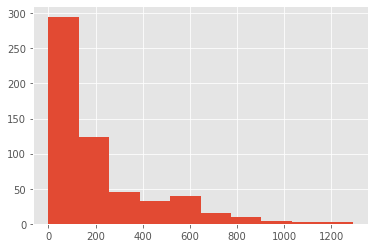

In [57]:
data_target['value_rub'].hist()

<AxesSubplot:>

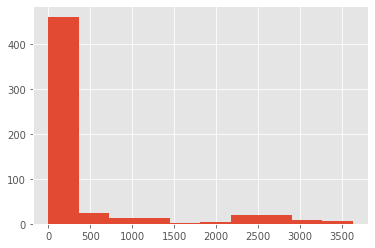

In [58]:
data_target['value_usd'].hist()

In [59]:
data_target['report_date']=data_target['report_date'].astype(np.datetime64);


<ipython-input-59-6e4339fca008>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_target['report_date']=data_target['report_date'].astype(np.datetime64);


In [60]:
data_target['month'],data_target['year']=data_target['report_date'].map(lambda x:x.month),data_target['report_date'].map(lambda x:x.year);

<ipython-input-60-f44ff2bec49b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_target['month'],data_target['year']=data_target['report_date'].map(lambda x:x.month),data_target['report_date'].map(lambda x:x.year);


In [61]:
data_target.drop(columns=['bank_group_id','index'],inplace=True);

/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


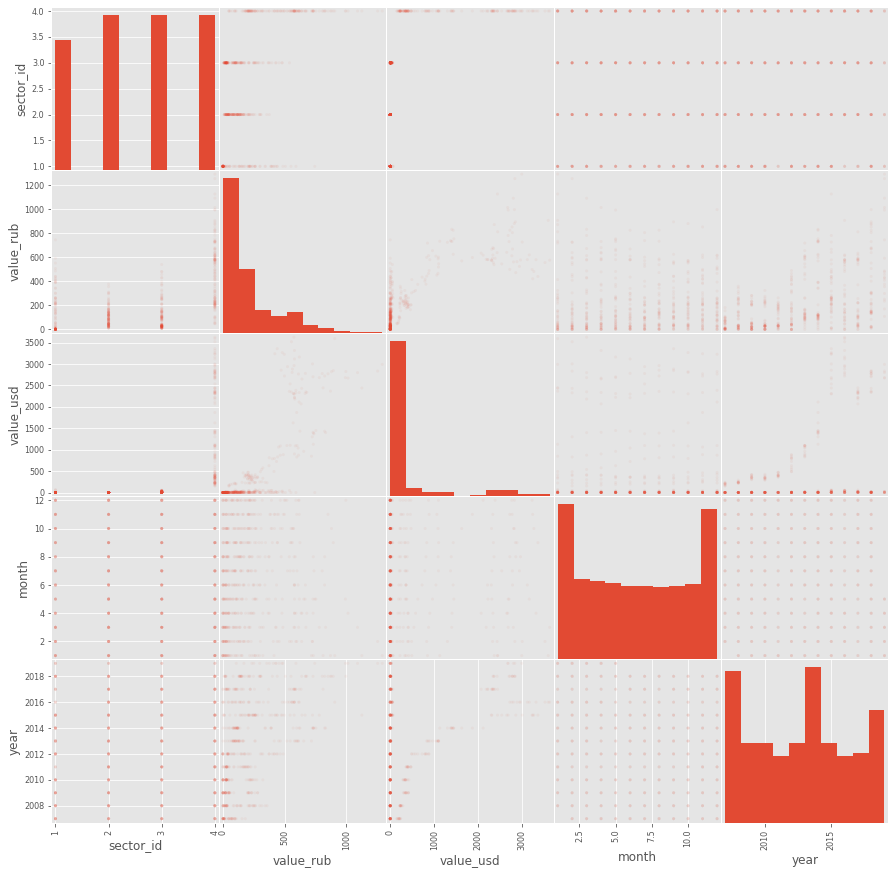

In [62]:
scatter_matrix(data_target[[col for col in data_target.columns
                            if col not in ['bank_group_id','index']]], alpha=0.05, figsize=(15, 15));


In [63]:
data_target.corr()

,sector_id,value_rub,value_usd,month,year
sector_id,1.000000,0.529891,0.567233,-0.007279,0.026425
value_rub,0.529891,1.000000,0.802117,-0.003058,0.482070
value_usd,0.567233,0.802117,1.000000,-0.005819,0.324852
month,-0.007279,-0.003058,-0.005819,1.000000,-0.079654
year,0.026425,0.482070,0.324852,-0.079654,1.000000


/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='report_date'>

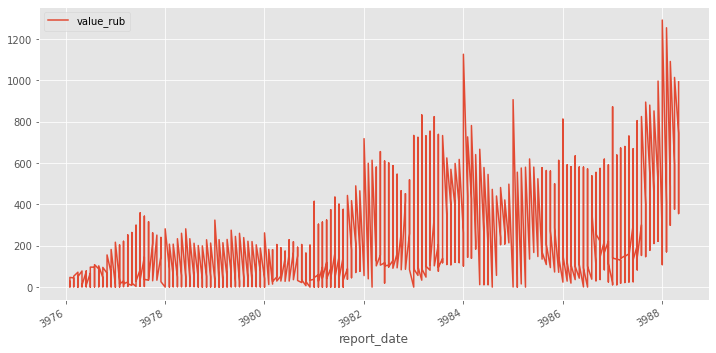

In [64]:
pre_plot=data_target[['value_rub']]
pre_plot.set_index(data_target['report_date'],inplace=True)
pre_plot.plot(figsize=(12,6))

<AxesSubplot:xlabel='report_date'>

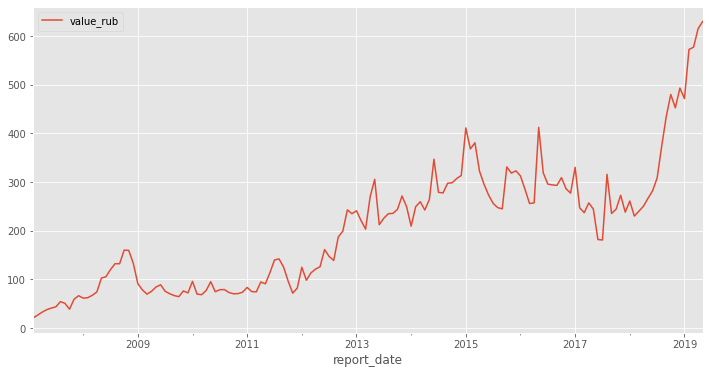

In [65]:
pre_plot = pre_plot.resample('M').agg(np.mean)
pre_plot.plot(figsize=(12,6))

In [66]:
pre_plot

,value_rub
report_date,
2007-02-28,20.645039
2007-03-31,26.463473
2007-04-30,32.672688
2007-05-31,37.633860
2007-06-30,40.992252
...,...
2019-01-31,471.656349
2019-02-28,572.542179
2019-03-31,577.363992


In [67]:
def plotting():
    year_start=data_target.year.unique()[0]
    for year in data_target.year.unique()[1:]:
        plt.figure(figsize=(15, 3))
        dates=data_target[data_target['year'].between(year_start,year)]['report_date']
        plt.plot(dates, data_target[data_target['year'].between(year_start,year)]['value_rub'].values, linewidth=1)
        ax=plt.gca()
        plt.gcf().autofmt_xdate()
        xfmt = md.DateFormatter('%Y-%m')
        ax.xaxis.set_major_formatter(xfmt)
        plt.xlabel(f"year:{year}")
        plt.ylabel("value_rub")
        year_start=year

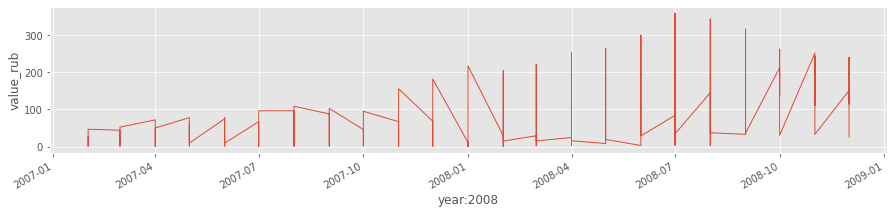

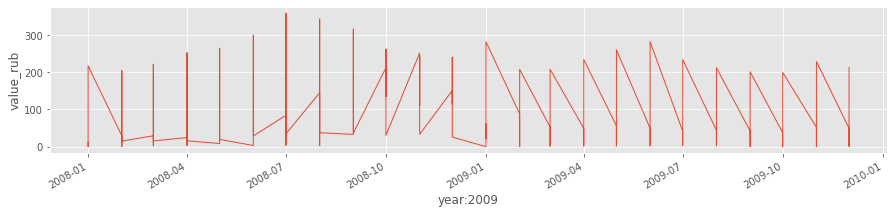

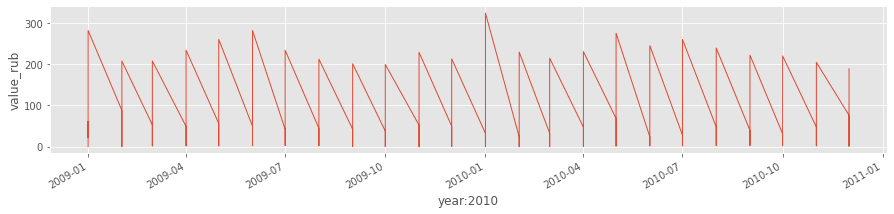

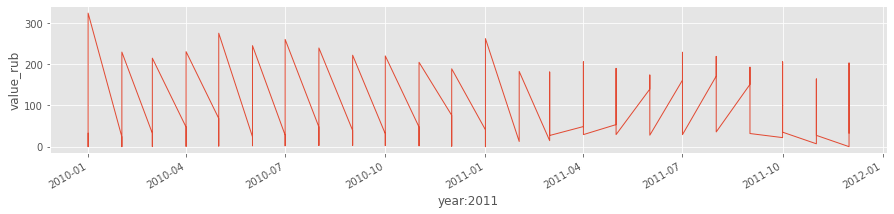

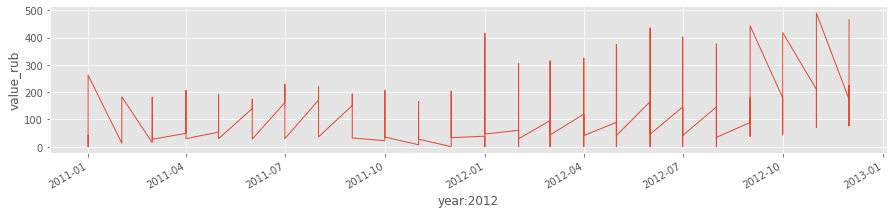

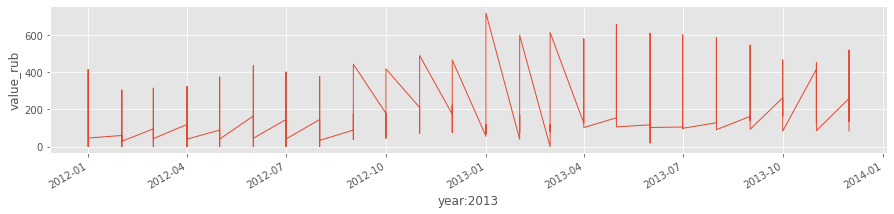

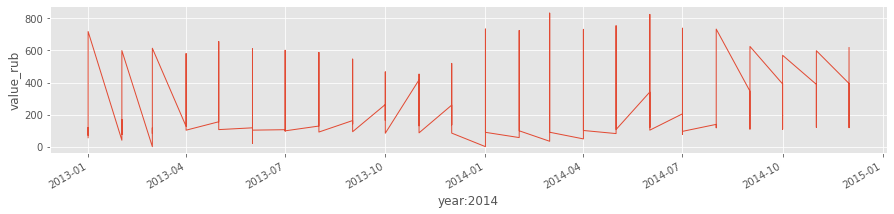

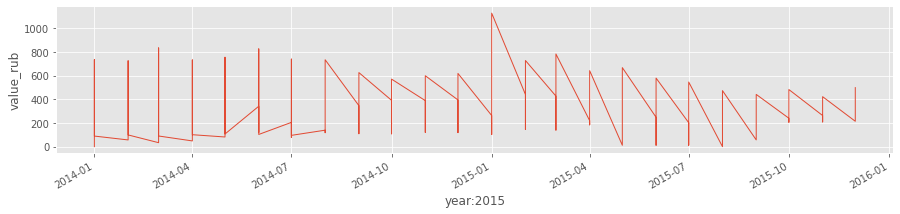

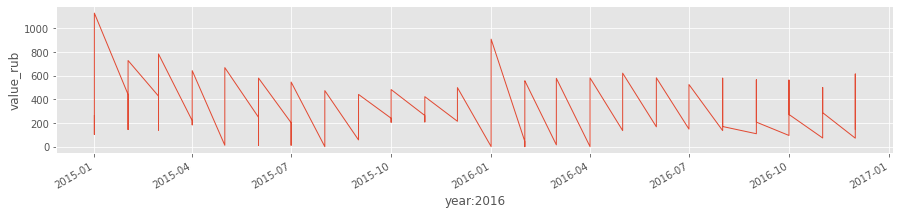

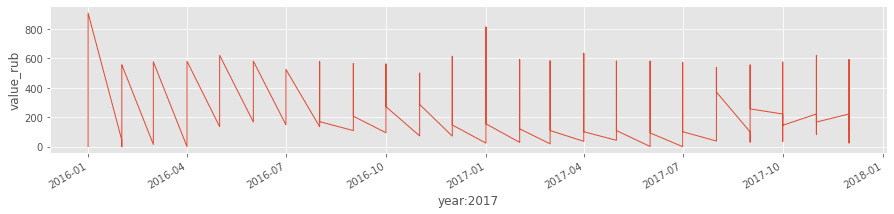

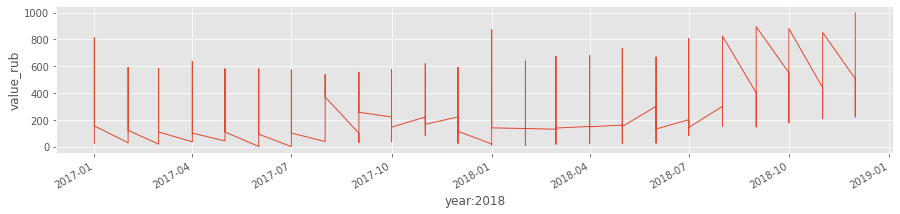

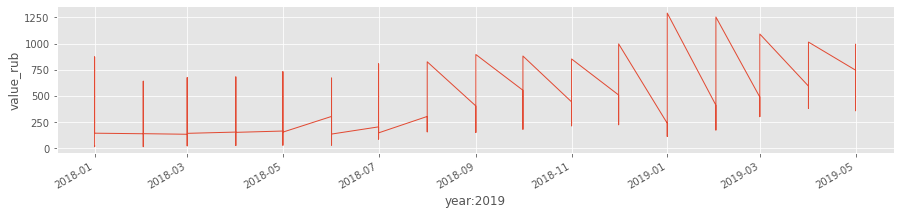

In [68]:
plotting()

In [69]:
sector_id_1=data_target[data_target['sector_id']==1][['value_rub']]
sector_id_1.set_index(data_target[data_target['sector_id']==1].report_date,inplace=True)

/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='report_date'>

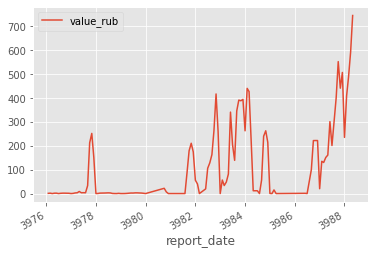

In [70]:
sector_id_1.plot()

In [71]:
sector_id_1['value_rub']=sector_id_1['value_rub'].map(lambda x:0.00001 if x==0 else x)

/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='report_date'>

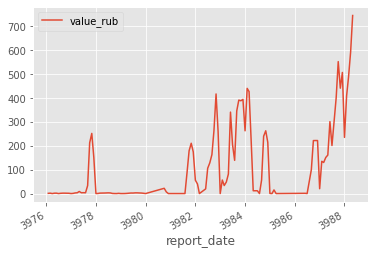

In [72]:
sector_id_1.plot()

<AxesSubplot:xlabel='report_date'>

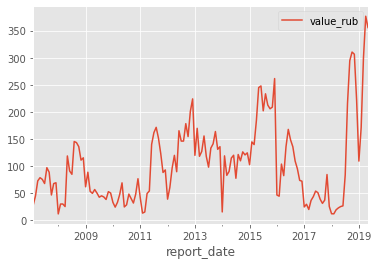

In [73]:
sector_id_2=data_target[data_target['sector_id']==2][['value_rub']]
sector_id_2.set_index(data_target[data_target['sector_id']==2].report_date,inplace=True)
sector_id_2.plot()

<AxesSubplot:xlabel='report_date'>

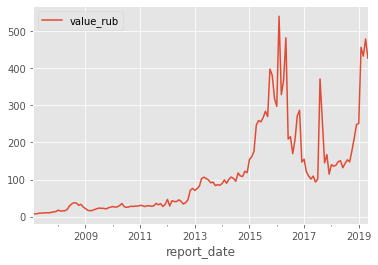

In [74]:
sector_id_3=data_target[data_target['sector_id']==3][['value_rub']]
sector_id_3.set_index(data_target[data_target['sector_id']==3].report_date,inplace=True)
sector_id_3.plot()

<AxesSubplot:xlabel='report_date'>

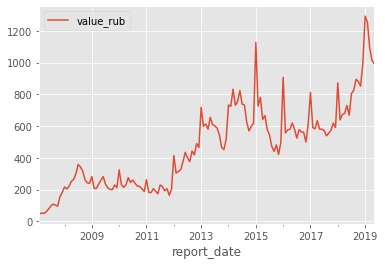

In [75]:
sector_id_4=data_target[data_target['sector_id']==4][['value_rub']]
sector_id_4.set_index(data_target[data_target['sector_id']==4].report_date,inplace=True)
sector_id_4.plot()

In [76]:
cor_set=sector_id_4[['value_rub']]
cor_set.columns=['value_rub_4']

In [77]:
cor_set['value_rub_3'],cor_set['value_rub_2'],cor_set['value_rub_1']=sector_id_3['value_rub'],sector_id_2['value_rub'],sector_id_1['value_rub']

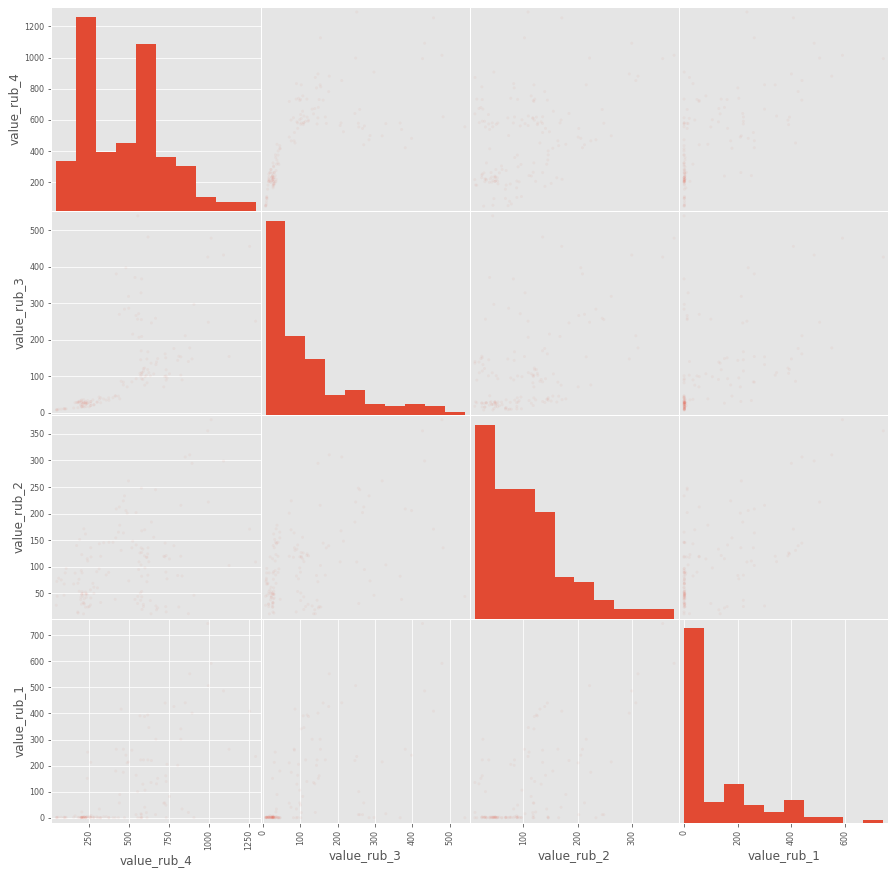

In [78]:
scatter_matrix(cor_set, alpha=0.05, figsize=(15, 15));


In [79]:
cor_set.describe()

,value_rub_4,value_rub_3,value_rub_2,value_rub_1
count,148.000000,148.000000,148.000000,124.000000
mean,468.974182,113.303391,103.675720,112.764136
std,264.591396,117.886622,74.725047,161.865475
min,47.034125,7.342596,11.048001,0.000005
25%,229.414019,27.462782,44.457104,0.910051
50%,469.479354,82.809436,88.617417,10.167122
75%,619.118565,148.919818,139.958468,210.937498
max,1291.902343,540.032011,376.641710,744.952791


In [80]:
sector_id_1['value_usd']=data_target[data_target['sector_id']==1][['value_usd']].values
sector_id_2['value_usd']=data_target[data_target['sector_id']==2][['value_usd']].values
sector_id_3['value_usd']=data_target[data_target['sector_id']==3][['value_usd']].values
sector_id_4['value_usd']=data_target[data_target['sector_id']==4][['value_usd']].values

In [81]:
def add_time(data):
    data=data.reset_index()
    data['month'],data['year']=data['report_date'].map(lambda x:x.month),data['report_date'].map(lambda x:x.year)
    return data

In [90]:
def add_year_mean(data):
    temp=data[['value_rub','value_usd']].resample('Y').agg(['sum','mean','max'])
    temp.columns = ['_last_year_'.join(col).strip() for col in temp.columns.values]
    data= add_time(data)
    temp=add_time(temp)
    temp['year']+=1
    add_year=temp[temp['year']==2008]
    add_year['year']=2007
    temp=temp.append(add_year)
    temp.drop(columns=['report_date','month'],inplace=True)
    data = pd.merge(data, temp, on=['year'], how='outer')
    data.set_index('report_date',inplace=True)
    temp2=data[data['year']>=2019].loc[:,['year','value_rub_last_year_sum','value_rub_last_year_mean','value_rub_last_year_max',
                                          'value_usd_last_year_sum', 'value_usd_last_year_mean', 'value_usd_last_year_max']]
    temp3=pd.DataFrame(index= pd.date_range(start='6/1/2019', end='6/1/2020',freq='M'))
    temp3.index.name='report_date'
    temp3=add_time(temp3)
    temp3=pd.merge(temp3,temp2,on=['year'], how='left')
    temp3.drop_duplicates(inplace=True)
    data.dropna(inplace=True)
    temp3['value_rub'],temp3['value_usd']=0,0
    temp3.set_index('report_date',inplace=True)
    return pd.concat([data,temp3])

In [92]:
add_year_mean(sector_id_1)

<ipython-input-90-3f52f515c048>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_year['year']=2007


,value_rub,value_usd,month,year,value_rub_last_year_sum,value_rub_last_year_mean,value_rub_last_year_max,value_usd_last_year_sum,value_usd_last_year_mean,value_usd_last_year_max
report_date,,,,,,,,,,
2007-02-01,0.920018,0.0,2.0,2007,12.550198,1.140927,1.640018,0.0,0.0,0.0
2007-03-01,1.580018,0.0,3.0,2007,12.550198,1.140927,1.640018,0.0,0.0,0.0
2007-04-01,0.000018,0.0,4.0,2007,12.550198,1.140927,1.640018,0.0,0.0,0.0
2007-05-01,1.500018,0.0,5.0,2007,12.550198,1.140927,1.640018,0.0,0.0,0.0
2007-06-01,1.600018,0.0,6.0,2007,12.550198,1.140927,1.640018,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-01-31,0.000000,0.0,1.0,2020,2467.193954,493.438791,744.952791,0.0,0.0,0.0
2020-02-29,0.000000,0.0,2.0,2020,2467.193954,493.438791,744.952791,0.0,0.0,0.0
2020-03-31,0.000000,0.0,3.0,2020,2467.193954,493.438791,744.952791,0.0,0.0,0.0


In [93]:
sector_id_1=add_year_mean(sector_id_1)

<ipython-input-90-3f52f515c048>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_year['year']=2007


In [100]:
sector_id_1.drop(columns=[col for col in sector_id_1.columns if col.find('usd')>0],inplace=True)

In [103]:

sector_id_2=add_year_mean(sector_id_2)
sector_id_3=add_year_mean(sector_id_3)
sector_id_4=add_year_mean(sector_id_4)


<ipython-input-90-3f52f515c048>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_year['year']=2007


In [788]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=5, interaction_only=True,
include_bias=False)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def eval_on_features(data,regressor):
# разбиваем массив признаков на обучающую и тестовую выборки
    X_train, X_test = data.loc['2007-01-01':'2015-06-01'][[col for col in data.columns if col not in ['value_rub','year']]],data.loc['2015-06-01':'2019-06-01'][[col for col in data.columns if col not in ['value_rub','year']]]
    # также разбиваем массив с зависимой переменной
    y_train,y_test=data.loc['2007-01-01':'2015-06-01']['value_rub'],data.loc['2015-06-01':'2019-06-01']['value_rub']
    
#     X_train= poly_transformer.fit_transform(X_train)
#     X_test=poly_transformer.transform(X_test)
#     enc=StandardScaler()
#     X_train=enc.fit_transform(X_train)
#     X_test=enc.transform(X_test)
    regressor.fit(X_train, y_train)
   
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    print("MSE для тестового набора: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    

    
    to_plot=data.loc['2015-06-01':'2019-06-01'][['value_rub']]
    to_plot['pred']=y_pred
    to_plot.plot()
    print("MSE для обучаемого набора: {:.2f}".format(mean_squared_error(y_train,y_pred_train)))

MSE для тестового набора: 47413.86
MSE для обучаемого набора: 1222.47


/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/valery/PycharmProjects/dep/depo/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


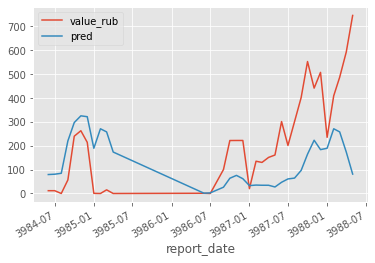

In [789]:
eval_on_features(sector_id_1,RandomForestRegressor(n_estimators=100,max_depth=10))

MSE для тестового набора: 9367.51
MSE для обучаемого набора: 135.54


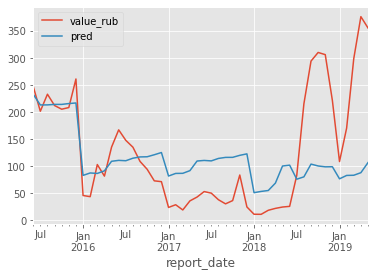

In [790]:
eval_on_features(sector_id_2,RandomForestRegressor(n_estimators=100,max_depth=9))

MSE для тестового набора: 16011.21
MSE для обучаемого набора: 13.60


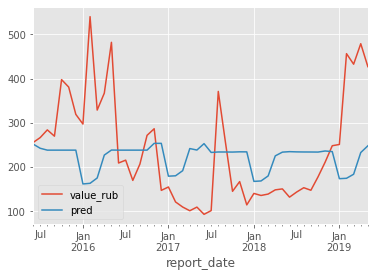

In [791]:
eval_on_features(sector_id_3,RandomForestRegressor(n_estimators=100,max_depth=10))

MSE для тестового набора: 30463.67
MSE для обучаемого набора: 609.56


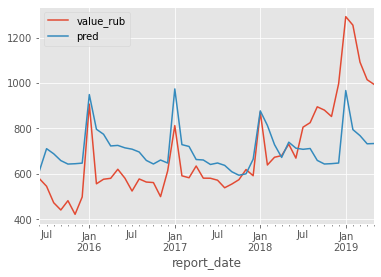

In [792]:
eval_on_features(sector_id_4,RandomForestRegressor(n_estimators=100,max_depth=10))

# Прогнозирование на год, с  2019 до 2020

In [793]:
def eval_on_features(data,regressor):
# разбиваем массив признаков на обучающую и тестовую выборки
    X_train, X_test = data.loc['2007-01-01':'2019-06-01'][[col for col in data.columns if col not in ['value_rub','year']]],data.loc[pd.date_range(start='6/1/2019', end='6/1/2020',freq='M')][[col for col in data.columns if col not in ['value_rub','year']]]
    # также разбиваем массив с зависимой переменной
    y_train=data.loc['2007-01-01':'2019-06-01']['value_rub']
    
#     X_train= poly_transformer.fit_transform(X_train)
#     X_test=poly_transformer.transform(X_test)
#     enc=StandardScaler()
#     X_train=enc.fit_transform(X_train)
#     X_test=enc.transform(X_test)
    regressor.fit(X_train, y_train)
   
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
#     print("MSE для тестового набора: {:.2f}".format(mean_squared_error(y_test,y_pred)))
    
    to_plot=pd.DataFrame(index=pd.date_range(start='6/1/2019', end='6/1/2020',freq='M'))
    to_plot['pred']=y_pred
    to_plot.plot()
    print("MSE для обучаемого набора: {:.2f}".format(mean_squared_error(y_train,y_pred_train)))
    return to_plot

MSE для обучаемого набора: 1076.56


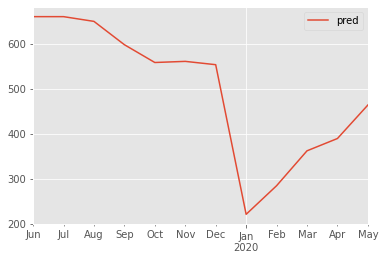

In [794]:
eval_on_features(sector_id_1,RandomForestRegressor(random_state=0, n_estimators=100,max_depth=10));

MSE для обучаемого набора: 168.54


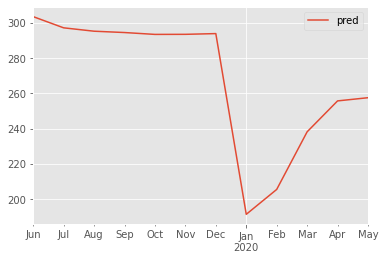

In [795]:
eval_on_features(sector_id_2,RandomForestRegressor(random_state=0, n_estimators=100,max_depth=10));

MSE для обучаемого набора: 462.16


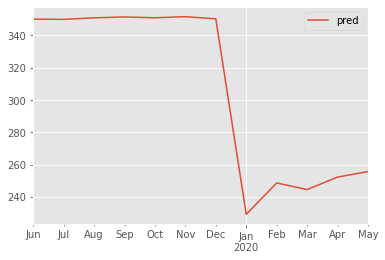

In [775]:
eval_on_features(sector_id_3,RandomForestRegressor(random_state=0, n_estimators=100,max_depth=10));

MSE для обучаемого набора: 449.67


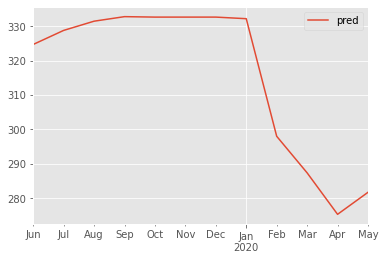

In [776]:
eval_on_features(sector_id_4,RandomForestRegressor(random_state=0, n_estimators=100,max_depth=10));